In [16]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save



In [17]:
import cloudpickle
import pickle
import gzip
import os
from collections import defaultdict, OrderedDict
from coffea import hist, processor 
from coffea.util import load, save

In [20]:
def scale(hists):
  
  scale={}
  for d in hists['sumw'].identifiers('dataset'):
      scale[d]=hists['sumw'].integrate('dataset', d).values(overflow='all')[()][1]
  print('Sumw extracted')

  for key in hists.keys():
      if key=='sumw': continue
      for d in hists[key].identifiers('dataset'):
          if 'MET' in d.name or 'SingleElectron' in d.name or 'SinglePhoton' in d.name or 'EGamma' in d.name: continue
          hists[key].scale({d:1/scale[d]},axis='dataset')
          print(scale)
  print('Histograms scaled')
  
  
  process = hist.Cat("process", "Process", sorting='placement')
  cats = ("dataset",)
  sig_map = OrderedDict()
  bkg_map = OrderedDict()
  data_map = OrderedDict()
#   bkg_map["Hbb"] = ("*HTo*")
  bkg_map["DY"] = ("DYJets*",)
#   bkg_map["DY+LF"] = ("LF--DYJets*",)
#   bkg_map["DY+jetsLO"] = ("lo--DYJets*",)
#   bkg_map["DY+jetsNNLO"] = ("nnlo--DYJets*",)
#   bkg_map["VV"] = (["WW*","WZ*","ZZ*"])
  bkg_map["WW"] = ("WW*", )
  bkg_map["WZ"] = ("WZ*", )
  bkg_map["ZZ"] = ("ZZ*", )
  bkg_map["ST"] = ("ST*",)
  bkg_map["TT"] = ("TT*",)
  bkg_map["W(lnu)+Jets"] = ("WJets*",)
#   bkg_map["W+LF"] = ("LF--WJets*",)
#   bkg_map["W+jetsLO"] = ("lo--WJets*",)
#   bkg_map["W+jetsNNLO"] = ("nnlo--WJets*",)
  bkg_map["Z(nunu)+jets"] = ("ZJetsToNuNu*",)
#   bkg_map["Z+LF"] = ("LF--ZJetsToNuNu*",)
#   bkg_map["Z+jetsLO"] = ("lo--ZJets*",)
#   bkg_map["Z+jetsNNLO"] = ("nnlo--ZJets*",)
  bkg_map["G+jets"] = ("GJets*",)
#   bkg_map["G+LF"] = ("LF--GJets*",)
#   bkg_map["G+jetsLO"] = ("lo--GJets*",)
#   bkg_map["G+jetsNNLO"] = ("nnlo--GJets*",)
  bkg_map["QCD"] = ("*QCD*",)
#   sig_map["Mhs_50"] = ("*Mhs_50*",)  ## signals
#   sig_map["Mhs_70"] = ("*Mhs_70*",)
#   sig_map["Mhs_90"] = ("*Mhs_90*",)
#   sig_map["MonoJet"] = ("MonoJet*",)  ## signals
#   sig_map["MonoW"] = ("MonoW*",)    ## signals
#   sig_map["MonoZ"] = ("MonoZ*",)    ## signals
  data_map["MET"] = ("MET*", )
  data_map["SingleElectron"] = ("SingleElectron*", )
  data_map["SinglePhoton"] = ("SinglePhoton*", )
  data_map["EGamma"] = ("EGamma*", )
  print('Processes defined')

  ###
  # Storing signal and background histograms
  ###
  bkg_hists={}
  sig_hists={}
  data_hists={}
  for key in hists.keys():
      bkg_hists[key] = hists[key].group(cats, process, bkg_map)
      sig_hists[key] = hists[key].group(cats, process, sig_map)
      data_hists[key] = hists[key].group(cats, process, data_map)
  
  return bkg_hists, sig_hists, data_hists

In [58]:
!pwd

/uscms_data/d3/runiyal/decaf_aug21/decaf/analysis/Rishabh_test_Jupyter_NB


In [21]:
hists = load('lep_lowWpT2018.merged')

In [22]:
bkg_hists, sig_hists, data_hists  = scale(hists)

Sumw extracted
{<StringBin (QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8) instance at 0x7f68003dfc88>: 54594132.90625, <StringBin (WJetsToLNu_Wpt-0To50_TuneCP5_13TeV-amcatnloFXFX-pythia8) instance at 0x7f68003df240>: 18750973352848.0, <StringBin (DYJetsToLL_M-50_HT-200to400_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8) instance at 0x7f6800d99860>: 11204572.82006836, <StringBin (ZJetsToNuNu_HT-200To400_13TeV-madgraph) instance at 0x7f6800d99ef0>: 23232889.450195312, <StringBin (MET) instance at 0x7f6800b56470>: 5125.0, <StringBin (WZ_TuneCP5_13TeV-pythia8) instance at 0x7f6800b56b70>: 3884166.94140625, <StringBin (ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph) instance at 0x7f6800b56fd0>: 350168.8583984375, <StringBin (ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8) instance at 0x7f6800b56780>: 266470389.875, <StringBin (ZJetsToNuNu_HT-400To600_13TeV-madgraph) instance at 0x7f6800b562e8>: 9483322.952392578, <StringBin (WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8

In [23]:
bkg_hists

{'sumw': <Hist (process,sumw) instance at 0x7f6800af27f0>,
 'ele_pT': <Hist (process,region,pT) instance at 0x7f6804279b38>,
 'dphi_e_etmiss': <Hist (process,region,dphi) instance at 0x7f6804279438>,
 'mT': <Hist (process,region,mT) instance at 0x7f6804279518>,
 'jet_pT': <Hist (process,region,pT) instance at 0x7f6800af4710>,
 'dphi_mu_etmiss': <Hist (process,region,dphi) instance at 0x7f68042e52b0>,
 'eT_miss': <Hist (process,region,eT) instance at 0x7f6804279128>,
 'mu_pT': <Hist (process,region,pT) instance at 0x7f6804279f28>}

In [24]:
sig_hists

{'sumw': <Hist (process,sumw) instance at 0x7f6801a4cb70>,
 'ele_pT': <Hist (process,region,pT) instance at 0x7f6800af2860>,
 'dphi_e_etmiss': <Hist (process,region,dphi) instance at 0x7f6801a4c5f8>,
 'mT': <Hist (process,region,mT) instance at 0x7f68042e5198>,
 'jet_pT': <Hist (process,region,pT) instance at 0x7f68003da400>,
 'dphi_mu_etmiss': <Hist (process,region,dphi) instance at 0x7f68042e5438>,
 'eT_miss': <Hist (process,region,eT) instance at 0x7f6804279208>,
 'mu_pT': <Hist (process,region,pT) instance at 0x7f6800f6dac8>}

In [7]:
data_hists

{'sumw': <Hist (process,sumw) instance at 0x7f094d094cc0>,
 'ele_pT': <Hist (process,region,pT) instance at 0x7f094d09a048>,
 'dphi_e_etmiss': <Hist (process,region,dphi) instance at 0x7f094d09aba8>,
 'mT': <Hist (process,region,mT) instance at 0x7f094d09abe0>,
 'jet_pT': <Hist (process,region,pT) instance at 0x7f094d0a07b8>,
 'dphi_mu_etmiss': <Hist (process,region,dphi) instance at 0x7f094d0a07f0>,
 'eT_miss': <Hist (process,region,eT) instance at 0x7f094d0a0860>,
 'mu_pT': <Hist (process,region,pT) instance at 0x7f094d0a8438>}

In [8]:
bkg_hists['ele_pT'].identifiers('region')

[<StringBin (secr) instance at 0x7f094d1474a8>,
 <StringBin (smucr) instance at 0x7f094d147518>,
 <StringBin (tecr) instance at 0x7f094d1473c8>,
 <StringBin (tmucr) instance at 0x7f094d147438>,
 <StringBin (wecr) instance at 0x7f094d1472e8>,
 <StringBin (wmucr) instance at 0x7f094d147358>]

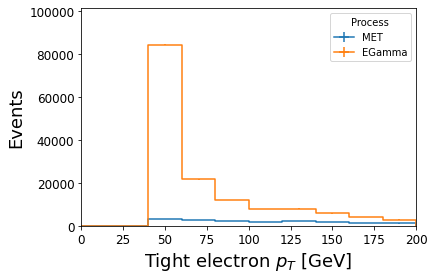

In [25]:
hist.plot1d(data_hists['ele_pT'].integrate('region'), overlay='process')

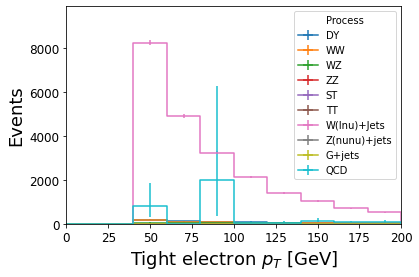

In [26]:
hist.plot1d(bkg_hists['ele_pT'].integrate('region'), overlay='process')

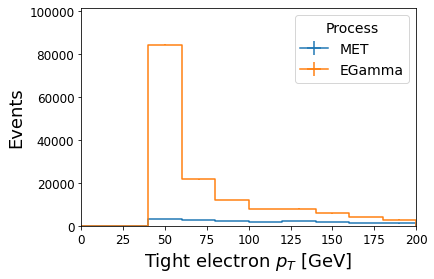

In [10]:
hist.plot1d(data_hists['ele_pT'].integrate('region'), overlay='process')

In [3]:
year='2018'

data={
    '2018':{
        'secr': 'EGamma',
        'smucr': 'MET',
        'wmucr': 'MET',
        'tmucr': 'MET',
        'wecr': 'EGamma',
        'tecr': 'EGamma'
    }
}
# hists= load('lep_lowWpT2018.scaled')

In [5]:
bkg_hists = hists['bkg']
sig_hists = hists['sig']
data_hists = hists['data']

# Bkg after scaling

ValueError: Data has no positive values, and therefore can not be log-scaled.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f6822e70378> (for post_execute):


ValueError: Data has no positive values, and therefore can not be log-scaled.

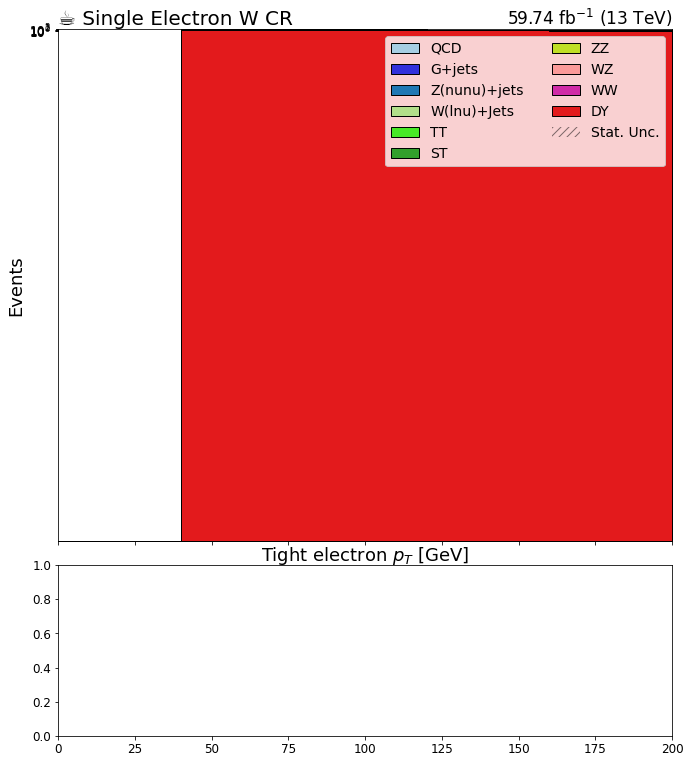

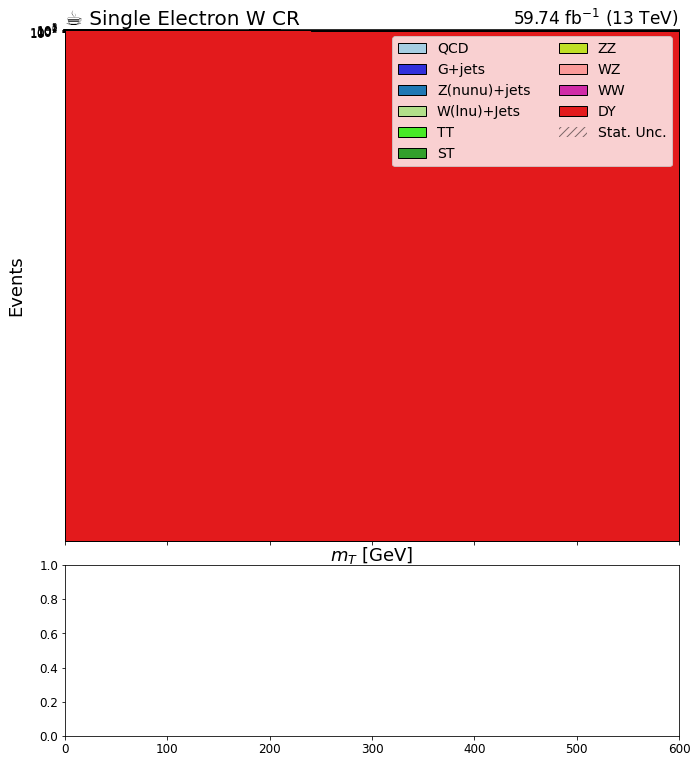

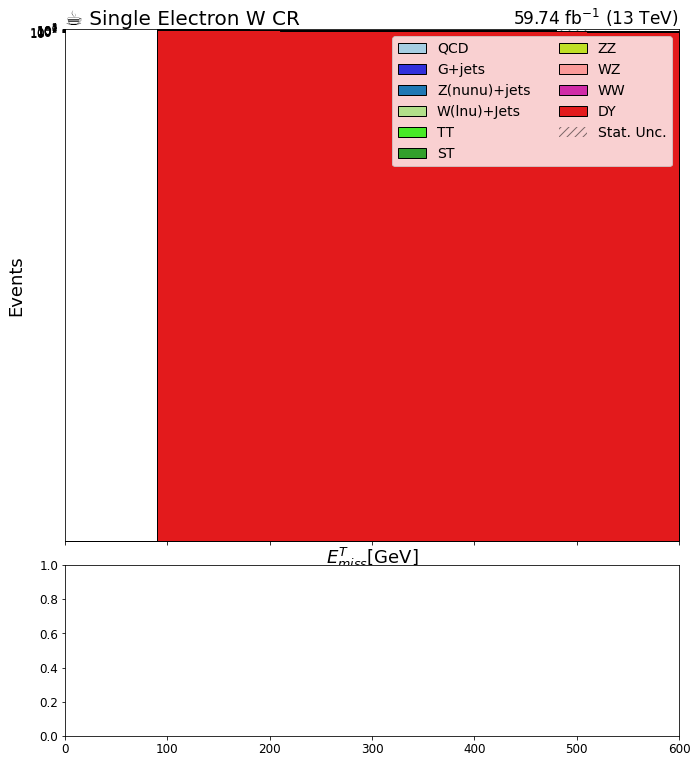

ValueError: Data has no positive values, and therefore can not be log-scaled.

In [27]:
from cycler import cycler

region = 'wecr'
# sys = 'nominal'



if not os.path.exists('../plots'):
    os.makedirs('../plots')
R = {}
R['secr'] = 'Signal electron Region'
R['smucr'] = 'Signal muon Region'
R['wmucr'] = 'Single Muon W CR'
R['tmucr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'
# R['zecr'] = 'Double Electron Z CR'
# R['zmcr'] = 'Double Muon Z CR'
# R['gcr'] = 'Single Photon CR'

for key in bkg_hists.keys():
    if key=='sumw': continue
#     if key=='template': continue
#     if key=='cutflow': continue
    #if key!='fjmass': continue
    for j in bkg_hists[key].identifiers('region'):
        if not (str(j) == region): continue
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
                  '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
                  '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))
        
       
#         plot.plot1d(data_hists[key].integrate('region',j)[data[year][str(j)]],            
#                 overlay="process",
#                 ax=ax,
#                 clear=False,
#                 error_opts=data_err_opts
#                    )

        plot.plot1d(bkg_hists[key].integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
#         plot.plotratio(data_hists[key].integrate('region',j).integrate('process',data[year][str(j)]), 
#                    bkg_hists[key].integrate('region',j).sum('process'),
#                    ax=rax,
#                    #overflow='over',
#                    error_opts=data_err_opts,
#                    denom_fill_opts={},
#                    guide_opts={},
#                    unc='num'
#                    )
        
#         rax.set_ylabel('Ratio (data/MC)')
#         rax.set_ylim(0.0,2.0)
#         rax.grid(axis='y')
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        if(key=='dilepmass'): ax.set_xlim(50, 130)
#         ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumi = plt.text(1., 1., r"59.74 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        os.system('mkdir -p ../plots/darkhiggs'+year+'/'+str(j)+'/')
        plot_path = os.path.abspath('../plots/darkhiggs'+year+'/'+str(j)+'/') 
        plot_name = 'stack_'+key+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))

# data without log

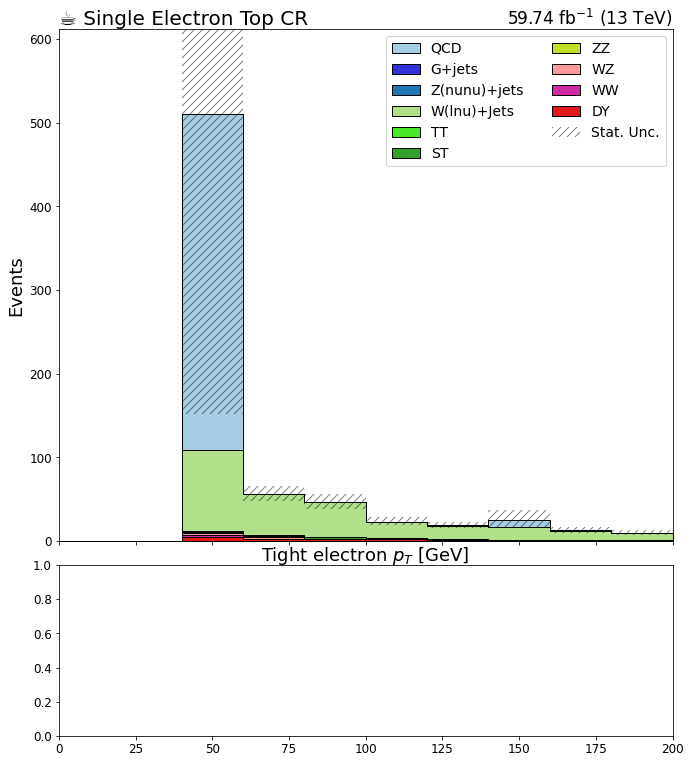

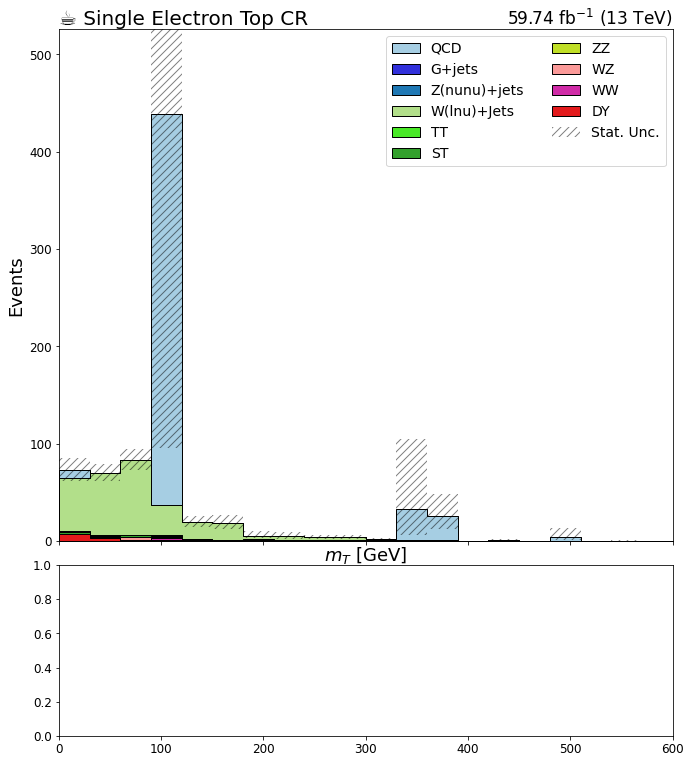

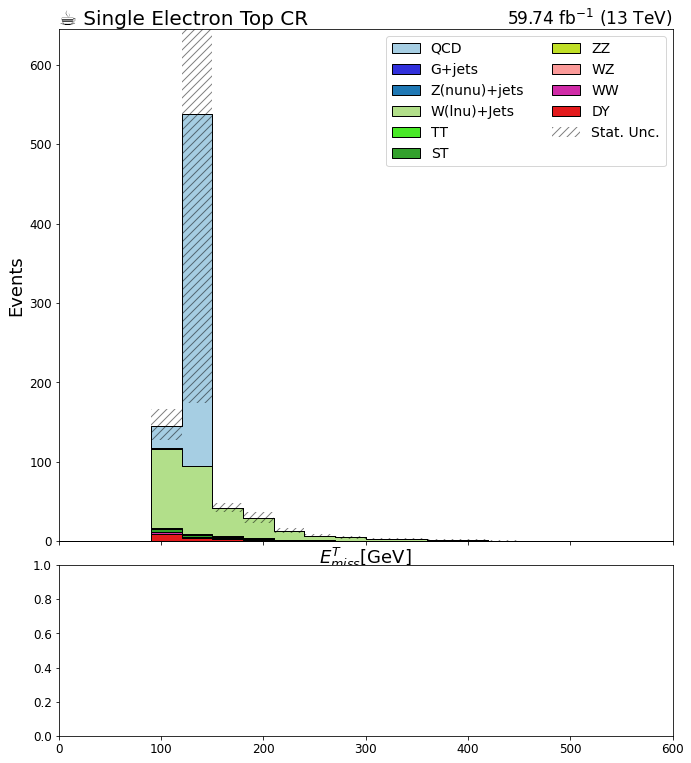

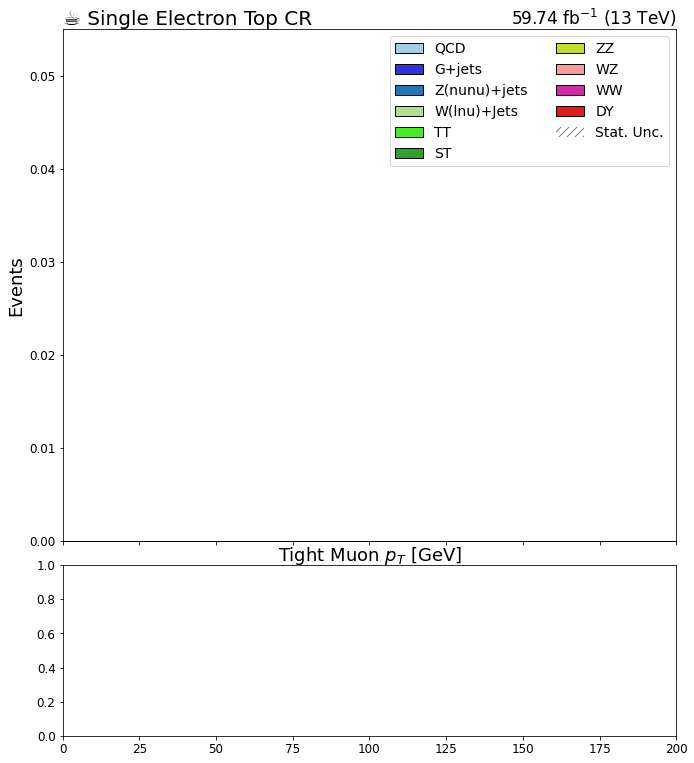

In [30]:
from cycler import cycler

region = 'tecr'
# sys = 'nominal'



if not os.path.exists('../plots'):
    os.makedirs('../plots')
R = {}
R['secr'] = 'Signal electron Region'
R['smucr'] = 'Signal muon Region'
R['wmucr'] = 'Single Muon W CR'
R['tmucr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'
# R['zecr'] = 'Double Electron Z CR'
# R['zmcr'] = 'Double Muon Z CR'
# R['gcr'] = 'Single Photon CR'

for key in bkg_hists.keys():
    if key=='sumw': continue
#     if key=='template': continue
#     if key=='cutflow': continue
    #if key!='fjmass': continue
    for j in bkg_hists[key].identifiers('region'):
        if not (str(j) == region): continue
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
                  '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
                  '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))
        
       
#         plot.plot1d(data_hists[key].integrate('region',j)[data[year][str(j)]],            
#                 overlay="process",
#                 ax=ax,
#                 clear=False,
#                 error_opts=data_err_opts
#                    )

        plot.plot1d(bkg_hists[key].integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
#         plot.plotratio(data_hists[key].integrate('region',j).integrate('process',data[year][str(j)]), 
#                    bkg_hists[key].integrate('region',j).sum('process'),
#                    ax=rax,
#                    #overflow='over',
#                    error_opts=data_err_opts,
#                    denom_fill_opts={},
#                    guide_opts={},
#                    unc='num'
#                    )
        
#         rax.set_ylabel('Ratio (data/MC)')
#         rax.set_ylim(0.0,2.0)
#         rax.grid(axis='y')
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
#         ax.set_yscale('log')
        if(key=='dilepmass'): ax.set_xlim(50, 130)
#         ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumi = plt.text(1., 1., r"59.74 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        os.system('mkdir -p ../plots/darkhiggs'+year+'/'+str(j)+'/')
        plot_path = os.path.abspath('../plots/darkhiggs'+year+'/'+str(j)+'/') 
        plot_name = 'stack_'+key+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))

In [17]:
region = 'tecr'

for key in bkg_hists.keys():
    if key=='sumw': continue
    for j in bkg_hists[key].identifiers('region'):
        if not (str(j) == region): continue 
        plot.plot1d(data_hists[key].integrate('region',j),            
              overlay="process",
              ax=ax,

                 )

In [ ]:
bkg_hists['mT']

In [28]:
genWeught_dict ={'QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8':54594132.90625
'WJetsToLNu_Wpt-0To50_TuneCP5_13TeV-amcatnloFXFX-pythia8':18750973352848.0
'DYJetsToLL_M-50_HT-200to400_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8':11204572.82006836
'ZJetsToNuNu_HT-200To400_13TeV-madgraph':23232889.450195312
'MET' :5125.0
'WZ_TuneCP5_13TeV-pythia8' :3884166.94140625
'ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph ':350168.8583984375
'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8':266470389.875
'ZJetsToNuNu_HT-400To600_13TeV-madgraph':9483322.952392578
'WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8':5913597.715759277
'WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8' :7567071.056640625
'QCD_HT700to1000_TuneCP5_13TeV-madgraphMLM-pythia8' :48028220.96166992
'DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8' :11516745.770996094
'ZJetsToNuNu_HT-100To200_13TeV-madgraph' :23675935.83203125
'EGamma sumgenweights':19886.0
'QCD_HT1500to2000_TuneCP5_13TeV-madgraphMLM-pythia8' :10883854.442749023
'ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8' :5125997103.125
'ZJetsToNuNu_HT-1200To2500_13TeV-madgraph':340171.0078125
'WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8':25415128.875
'WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8' :8357921.15234375
'GJets_1j_Gpt-650ToInf_5f_NLO_Autumn18' :355388.83363342285
'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8' :298029859662.0
'WW_TuneCP5_13TeV-pythia8' :7846135.853515625
'DYJetsToLL_M-50_HT-400to600_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8' :9614508.719726562
'ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8' :334874746.1015625
'ZJetsToNuNu_HT-600To800_13TeV-madgraph' :5726462.8896484375
'GJets_1j_Gpt-400To650_5f_NLO_Autumn18' :54664818.81347656
'DYJetsToLL_M-50_HT-800to1200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8' :3120982.0595703125
'QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8' :54247036.296875
'GJets_1j_Gpt-250To400_5f_NLO_Autumn18 sumgenweights':217662176.57714844
'WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8' :29481346.024414062
'QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8' :15403521.732910156
'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8' :16578753642.5
'DYJetsToLL_M-50_HT-600to800_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8' :8826238.055664062
'QCD_HT2000toInf_TuneCP5_13TeV-madgraphMLM-pythia8' :5412264.48046875
'DYJetsToLL_M-50_HT-1200to2500_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8' :531566.8515625
'GJets_1j_Gpt-100To250_5f_NLO_Autumn18' :16388549497.780273
'DYJetsToLL_M-50_HT-2500toInf_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8' :415517.01708984375
'WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8' :3189396.021484375
'QCD_HT500to700_TuneCP5_13TeV-madgraphMLM-pythia8' :55046820.94433594
'ZZ_TuneCP5_13TeV-pythia8' :1978776.7138671875
'ZJetsToNuNu_HT-800To1200_13TeV-madgraph' :2055725.501953125
'WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8' :19690762.064941406}


SyntaxError: invalid syntax (<ipython-input-28-ed77a6551a4f>, line 1)

In [ ]:
dataset:QCD_HT1500to2000_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:10883854.442749023
dataset:ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 sumgenweights:5125997103.125
dataset:QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:15403521.732910156
dataset:ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 sumgenweights:16578753642.5
dataset:DYJetsToLL_M-50_HT-600to800_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 sumgenweights:8826238.055664062
dataset:QCD_HT2000toInf_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:5412264.48046875
dataset:DYJetsToLL_M-50_HT-2500toInf_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 sumgenweights:415517.01708984375
dataset:WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:3189396.021484375
dataset:GJets_1j_Gpt-250To400_5f_NLO_Autumn18 sumgenweights:217662176.57714844
dataset:WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:29481346.024414062
dataset:DYJetsToLL_M-50_HT-1200to2500_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 sumgenweights:531566.8515625
dataset:GJets_1j_Gpt-100To250_5f_NLO_Autumn18 sumgenweights:16388549497.780273
dataset:QCD_HT500to700_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:55046820.94433594
dataset:ZZ_TuneCP5_13TeV-pythia8 sumgenweights:1978776.7138671875
dataset:ZJetsToNuNu_HT-800To1200_13TeV-madgraph sumgenweights:2055725.501953125
dataset:WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:19690762.064941406
dataset:MET sumgenweights:5125.0
dataset:WZ_TuneCP5_13TeV-pythia8 sumgenweights:3884166.94140625
dataset:ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph sumgenweights:350168.8583984375
dataset:ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8 sumgenweights:266470389.875
dataset:ZJetsToNuNu_HT-400To600_13TeV-madgraph sumgenweights:9483322.952392578
dataset:WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:5913597.715759277
dataset:WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:7567071.056640625
dataset:QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:54594132.90625
dataset:WJetsToLNu_Wpt-0To50_TuneCP5_13TeV-amcatnloFXFX-pythia8 sumgenweights:18750973352848.0
dataset:DYJetsToLL_M-50_HT-200to400_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 sumgenweights:11204572.82006836
dataset:ZJetsToNuNu_HT-200To400_13TeV-madgraph sumgenweights:23232889.450195312
dataset:WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:8357921.15234375
dataset:GJets_1j_Gpt-650ToInf_5f_NLO_Autumn18 sumgenweights:355388.83363342285
dataset:ZJetsToNuNu_HT-600To800_13TeV-madgraph sumgenweights:5726462.8896484375
dataset:GJets_1j_Gpt-400To650_5f_NLO_Autumn18 sumgenweights:54664818.81347656
dataset:TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 sumgenweights:296744582418.0
dataset:WW_TuneCP5_13TeV-pythia8 sumgenweights:7846135.853515625
dataset:DYJetsToLL_M-50_HT-800to1200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 sumgenweights:3120982.0595703125
dataset:QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8 sumgenweights:54247036.296875
dataset:ZJetsToNuNu_HT-100To200_13TeV-madgraph sumgenweights:23675935.83203125
dataset:EGamma sumgenweights:19853.0